In [1]:
!pip install pillow pycryptodome numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.0 MB/s eta 0:00:00


In [3]:
from PIL import Image
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
import numpy as np

# Función para cargar y convertir la imagen en bytes
def load_image(image_path):
    img = Image.open(image_path).convert("RGBA")
    img_data = np.array(img)
    return img_data

# Función para encriptar y guardar la imagen
def encrypt_image(img_data, mode, key, iv=None):
    # Convertimos la imagen en bytes
    img_bytes = img_data.tobytes()

    # Inicializamos el cifrador AES
    if mode == AES.MODE_ECB:
        cipher = AES.new(key, AES.MODE_ECB)
    elif mode == AES.MODE_CBC:
        cipher = AES.new(key, AES.MODE_CBC, iv)

    # Ciframos los bytes de la imagen
    # AES solo funciona con bloques de 16 bytes, así que aseguramos un padding
    padded_img_bytes = img_bytes + b'\0' * (16 - len(img_bytes) % 16)
    encrypted_bytes = cipher.encrypt(padded_img_bytes)

    # Convertimos los bytes cifrados a un array de numpy con la forma adecuada
    # Usamos el tamaño original y quitamos los bytes de padding
    encrypted_img_data = np.frombuffer(encrypted_bytes[:len(img_bytes)], dtype=np.uint8).reshape(405, 480, 4)
    return encrypted_img_data

# Función para guardar la imagen cifrada
def save_image(img_data, output_path):
    img = Image.fromarray(img_data, "RGBA")
    img.save(output_path)

# Cargar la imagen original
img_data = load_image("tux.bmp")

# Definir la llave y el IV para el cifrado AES de 128 bits
key = get_random_bytes(16)  # 128 bits
iv = get_random_bytes(16)   # IV para CBC

# Modo ECB
encrypted_img_ecb = encrypt_image(img_data, AES.MODE_ECB, key)
save_image(encrypted_img_ecb, "tux_ecb.png")

# Modo CBC
encrypted_img_cbc = encrypt_image(img_data, AES.MODE_CBC, key, iv)
save_image(encrypted_img_cbc, "tux_cbc.png")

print("Las imágenes cifradas han sido guardadas como 'tux_ecb.png' y 'tux_cbc.png'.")


Las imágenes cifradas han sido guardadas como 'tux_ecb.png' y 'tux_cbc.png'.


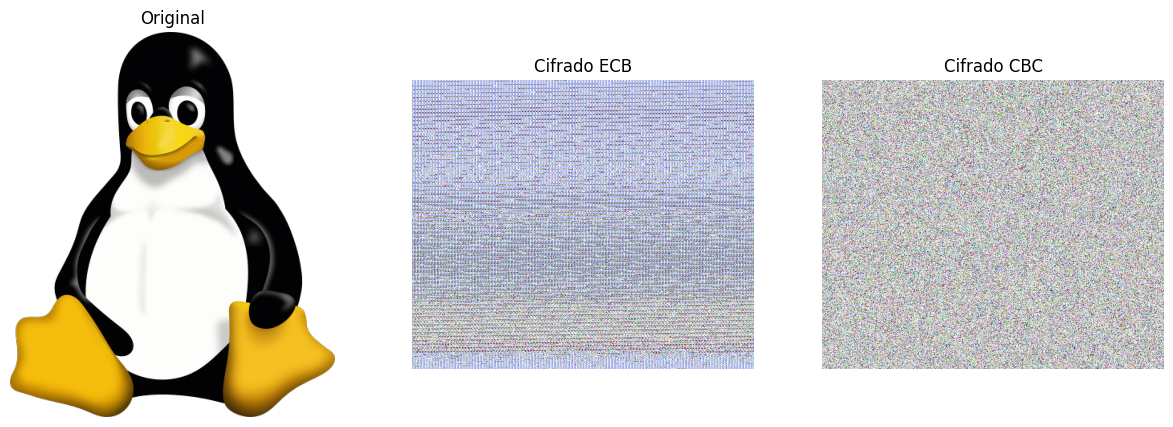

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

# Función para mostrar las tres imágenes
def display_images(original_path, ecb_path, cbc_path):
    # Cargar cada imagen
    original_img = Image.open(original_path)
    ecb_img = Image.open(ecb_path)
    cbc_img = Image.open(cbc_path)

    # Crear una figura para mostrar las imágenes en una fila
    plt.figure(figsize=(15, 5))

    # Mostrar la imagen original
    plt.subplot(1, 3, 1)
    plt.title("Original")
    plt.imshow(original_img)
    plt.axis('off')

    # Mostrar la imagen cifrada en ECB
    plt.subplot(1, 3, 2)
    plt.title("Cifrado ECB")
    plt.imshow(ecb_img)
    plt.axis('off')

    # Mostrar la imagen cifrada en CBC
    plt.subplot(1, 3, 3)
    plt.title("Cifrado CBC")
    plt.imshow(cbc_img)
    plt.axis('off')

    # Mostrar todas las imágenes
    plt.show()

# Rutas de las imágenes
original_image_path = "tux.bmp"
ecb_image_path = "tux_ecb.png"
cbc_image_path = "tux_cbc.png"

# Mostrar las imágenes
display_images(original_image_path, ecb_image_path, cbc_image_path)
